In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

# CLT

In [2]:
df_hw = pd.read_csv("weight-height.csv")

In [3]:
df_hw.shape

(10000, 3)

In [4]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df_height = df_hw["Height"]

In [6]:
mu = df_height.mean() # Population mean
mu

66.36755975482124

In [7]:
sigma = df_height.std() # Population std dev
sigma

3.8475281207732293

<AxesSubplot:xlabel='Height', ylabel='Count'>

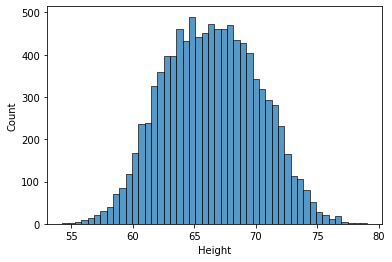

In [8]:
sns.histplot(df_height)

In [9]:
df_height.sample(5)

5733    67.959814
5727    61.120116
6448    64.393366
1717    69.338298
9503    65.727711
Name: Height, dtype: float64

In [10]:
# Every time, this mean is different
# It is close to population mean of 66.3
np.mean(df_height.sample(5)) 

67.29788258162978

In [11]:
sample_mean_5 = [np.mean(df_height.sample(5)) for i in range(20000) ]

In [12]:
len(sample_mean_5)
# each of these numbers represents a sample mean of sample size 5

20000

<AxesSubplot:ylabel='Count'>

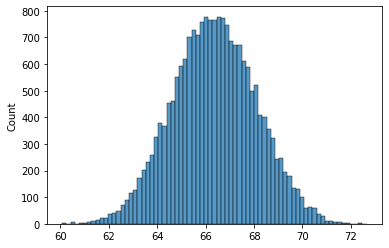

In [13]:
sns.histplot(sample_mean_5)

In [14]:
np.mean(sample_mean_5)

66.3645917314545

In [15]:
np.std(sample_mean_5)

1.7250251190860824

In [16]:
sigma/np.sqrt(5)

1.7206668846781923

Changing sample size to 20

In [17]:
np.mean(df_height.sample(20))

66.76110151981477

In [18]:
sample_mean_20 = [np.mean(df_height.sample(20)) for i in range(20000)]

In [19]:
len(sample_mean_20) 
# Each number represents a sample mean of sample size 20

20000

<AxesSubplot:ylabel='Count'>

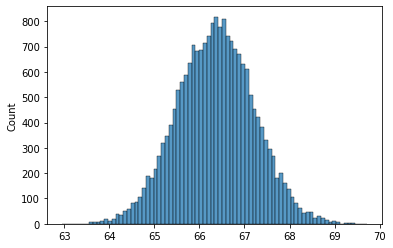

In [20]:
sns.histplot(sample_mean_20)

In [21]:
np.mean(sample_mean_20)

66.36331406979353

In [22]:
np.std(sample_mean_20)

0.8520678642161935

In [23]:
sigma/np.sqrt(20)

0.8603334423390961

Change sample size to 100

In [24]:
sample_mean_100 = [np.mean(df_height.sample(100)) for i in range(20000) ] 

In [25]:
len(sample_mean_100)

20000

<AxesSubplot:ylabel='Count'>

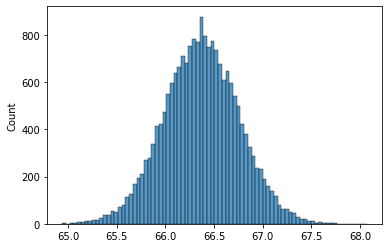

In [26]:
sns.histplot(sample_mean_100)

In [27]:
np.mean(sample_mean_100)

66.37000997299543

In [28]:
np.std(sample_mean_100)

0.38617290598379195

In [29]:
sigma/np.sqrt(100)

0.3847528120773229

# Blood pressure example

Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg

Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.

In [30]:
std_error = 10/np.sqrt(16)
std_error

2.5

In [31]:
z = (125 - 122)/std_error
z

1.2

In [32]:
prob = 1 - norm.cdf(z)
prob

0.11506967022170822

What if we had sampled 100 people instead of 16? What is the prob of average being greater than 125?

In [33]:
std_error = 10/np.sqrt(100)
std_error

1.0

In [34]:
z = (125 - 122)/std_error
z

3.0

In [35]:
prob = 1 - norm.cdf(z)
prob

0.0013498980316301035

# Bharath Function

This is a function suggested by one of the students in class to solve problems in CLT

In [36]:
def clt_prob(mu, sigma, n, obs):
    std_error = sigma/np.sqrt(n)
    z = (obs - mu)/std_error
    prob_less = norm.cdf(z)
    prob_greater = 1 - norm.cdf(z)
    return prob_less, prob_greater

In [37]:
clt_prob(122, 10, 16, 125)

(0.8849303297782918, 0.11506967022170822)

In [38]:
clt_prob(1000, 200, 4, 1110)

(0.8643339390536173, 0.13566606094638267)

In [39]:
clt_prob(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)